In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import Holt, ExponentialSmoothing


In [2]:
df = pd.read_csv("C:/Users/Administrator.DAI-PC2/Desktop/ML/Day13/monthly-milk-production-pounds-p.csv")
df

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727
...,...,...
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797


In [3]:
series = df['Milk']

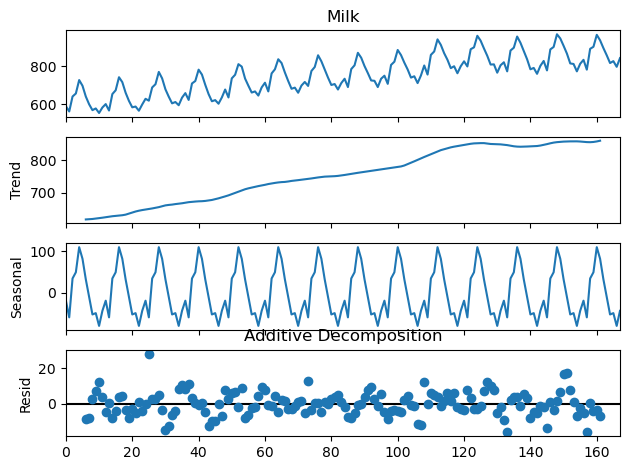

In [4]:
result = seasonal_decompose(series, model='additive', period=12)
result.plot()
plt.title("Additive Decomposition")
plt.show()

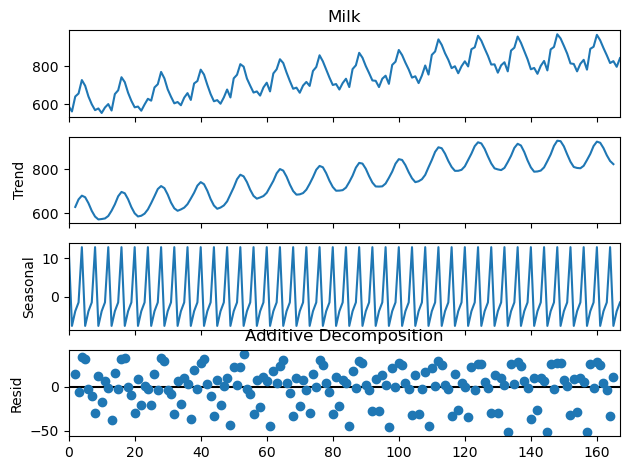

In [5]:
result = seasonal_decompose(series, model='additive', period=4)
result.plot()
plt.title("Additive Decomposition")
plt.show()

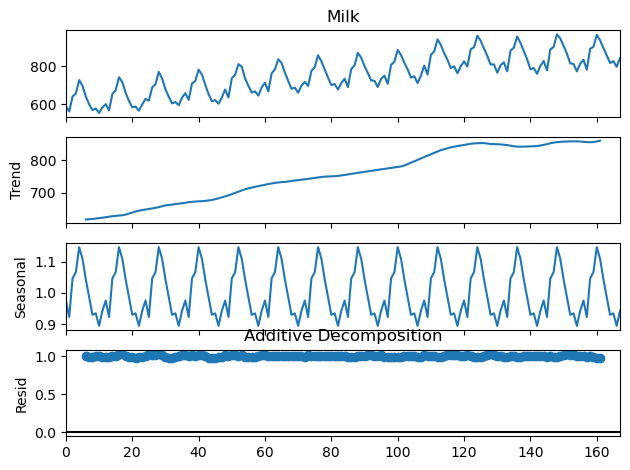

In [6]:
result = seasonal_decompose(series, model='multiplicative', period=12)                                         
result.plot()
plt.title("Additive Decomposition")
plt.show()

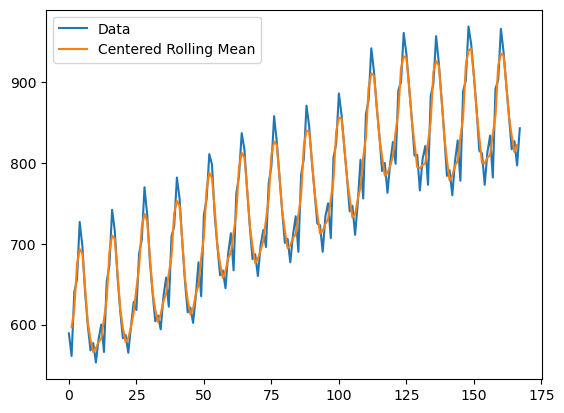

In [7]:
y=df['Milk']
span=3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered Rolling Mean')
plt.legend(loc='best')

In [8]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

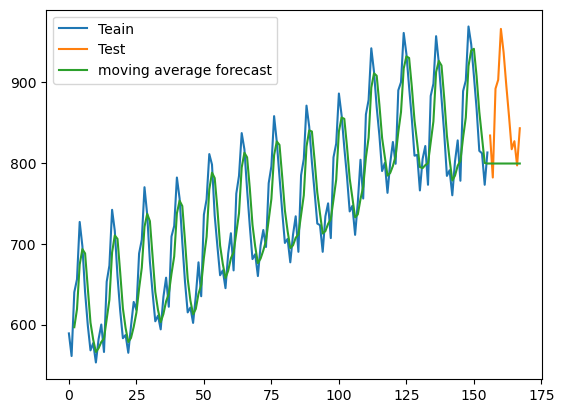

In [9]:
span=3
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Teain')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='moving average forecast')
plt.legend(loc='best')

In [10]:
from sklearn.metrics import mean_squared_error
rms= np.sqrt(mean_squared_error(y_test,MA_series))
print(rms)

83.33766655400582


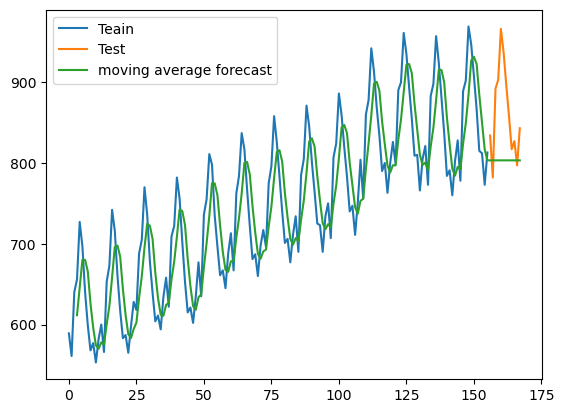

In [11]:
span=4
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Teain')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='moving average forecast')
plt.legend(loc='best')

In [12]:
rms= np.sqrt(mean_squared_error(y_test,MA_series))
print(rms)

80.40146661183074


71.4970861877135


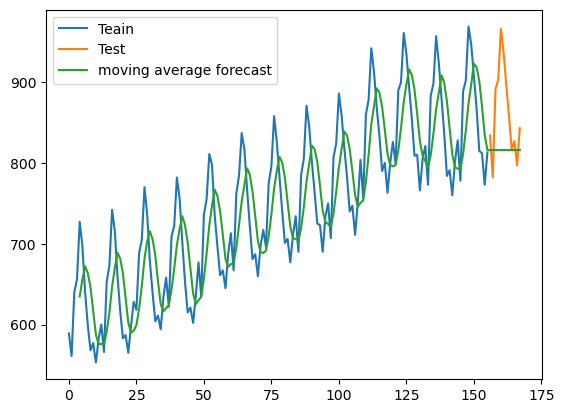

In [13]:
span=5
fcast = y_train.rolling(span).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Teain')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='moving average forecast')
plt.legend(loc='best')
rms= np.sqrt(mean_squared_error(y_test,MA_series))
print(rms)

In [14]:
alpha=0.1

from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


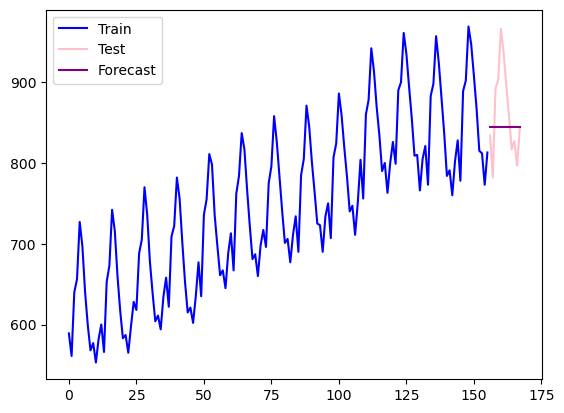

In [15]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')

In [16]:
print(fit1.params)
print('RMSE:',np.sqrt(mean_squared_error(y_test,fcast1)))


{'smoothing_level': 0.1, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 57.02407775273818


{'smoothing_level': 0.2, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 60.41719003278307


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


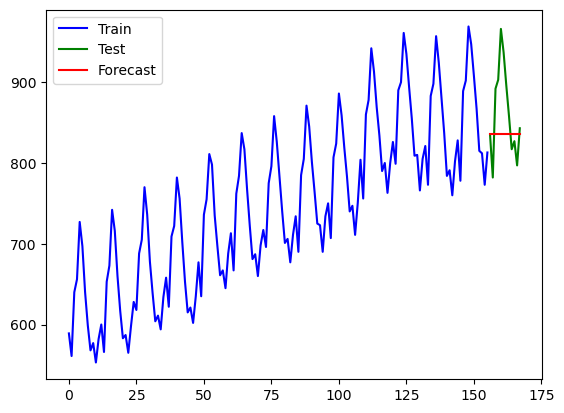

In [17]:
alpha=0.2

from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
plt.legend(loc='best')

print(fit1.params)
print('RMSE:',np.sqrt(mean_squared_error(y_test,fcast1)))


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


{'smoothing_level': 0.3, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 66.49878205261881


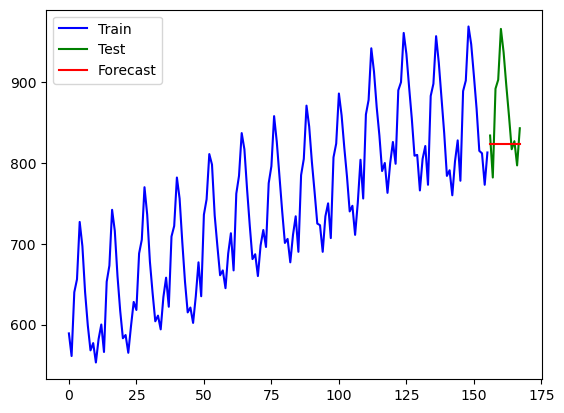

In [18]:
alpha=0.3

from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
plt.legend(loc='best')

print(fit1.params)
print('RMSE:',np.sqrt(mean_squared_error(y_test,fcast1)))


{'smoothing_level': 0.4, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE: 72.658498800867


C:\Users\Administrator.DAI-PC2\AppData\Roaming\Python\Python311\site-packages\pandas\util\_decorators.py:211: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


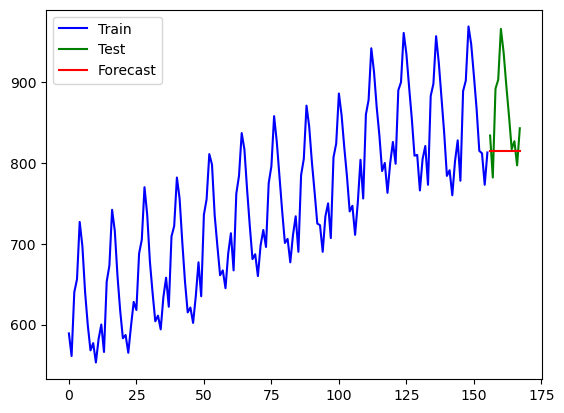

In [19]:
alpha=0.4

from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)
fit1=ses.fit(smoothing_level=alpha)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
plt.legend(loc='best')

print(fit1.params)
print('RMSE:',np.sqrt(mean_squared_error(y_test,fcast1)))


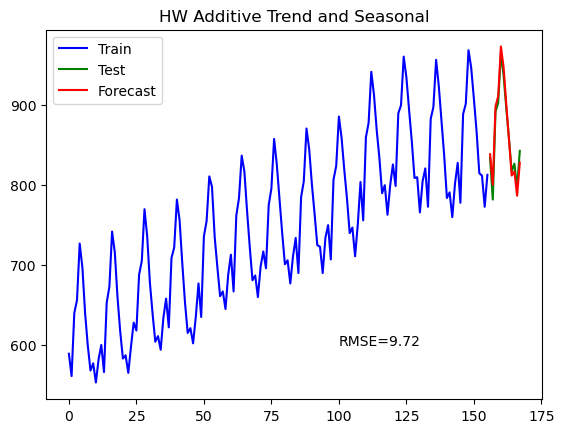

In [20]:
#Holts Exponential trend method
alpha=0.8
beta=0.02
gamma=0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='add')
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal")
plt.legend(loc='best')
plt.show()


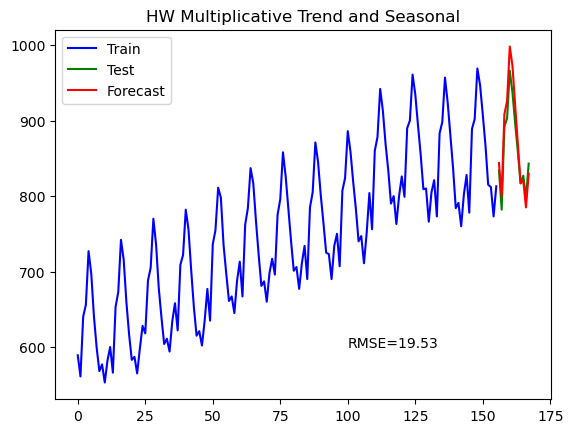

In [21]:
#Holts Exponential trend method
alpha=0.8
beta=0.02
gamma=0.1

hw_mul= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal='mul')
fit1 = hw_mul.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Multiplicative Trend and Seasonal")
plt.legend(loc='best')
plt.show()


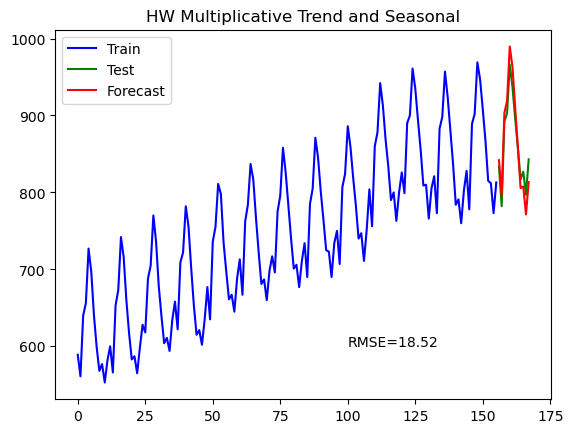

In [22]:
#Holts Exponential trend method
alpha=0.8
beta=0.02
gamma=0.1
phi=0.1

hw_mul= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',
                             seasonal='mul',damped_trend=True)
fit1 = hw_mul.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma,
                  damping_trend=phi)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Multiplicative Trend and Seasonal")
plt.legend(loc='best')
plt.show()


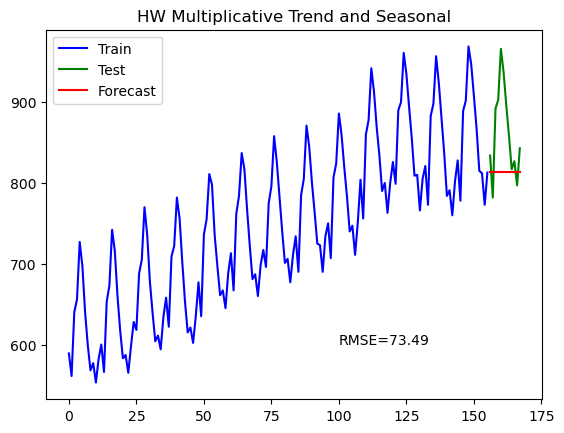

In [23]:
#Holts Exponential trend method

hw_mul= ExponentialSmoothing(y_train)
fit1 = hw_mul.fit()
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Multiplicative Trend and Seasonal")
plt.legend(loc='best')
plt.show()


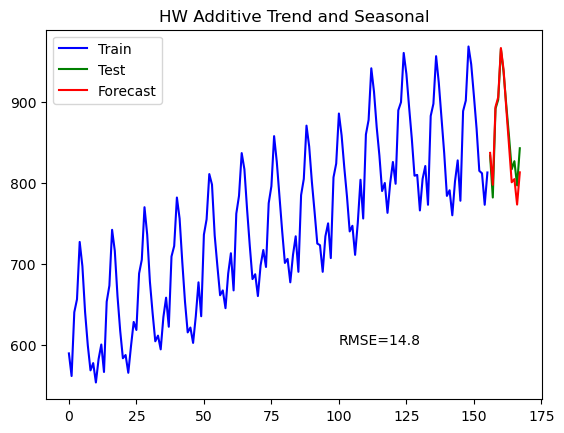

In [24]:
#Holts Exponential trend method
alpha=0.8
beta=0.02
gamma=0.1
phi=0.1

hw_add = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', 
                              seasonal='add', damped_trend=True)
fit1 = hw_add.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal=gamma,
                 damping_trend=phi)
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal")
plt.legend(loc='best')
plt.show()


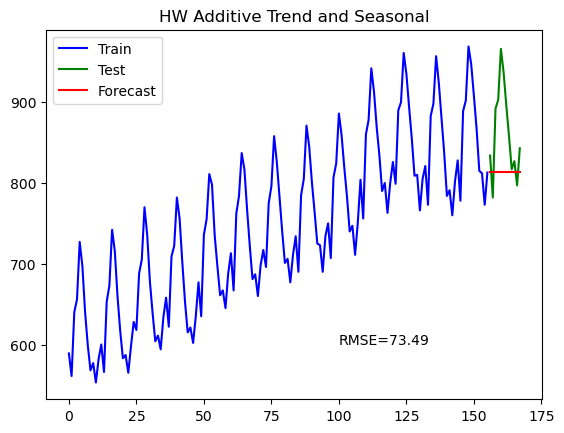

In [25]:
#Holts winter Exponential trend method

hw_add = ExponentialSmoothing(y_train)
fit1 = hw_add.fit()
fcast1=fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='green',label='Test')
fcast1.plot(color='red',label='Forecast')
error= round(np.sqrt(mean_squared_error(y_test, fcast1)),2)
plt.text(100,600, "RMSE="+str(error))
plt.title("HW Additive Trend and Seasonal")
plt.legend(loc='best')
plt.show()
